# Hypothesis testing
hypothesis testing is statistical technich which is used to compare the sample from the population data or to compare the two data sets 

To asses the population data with the help of sample 

1.it is measuring and examing the a random sample of the popupaltion beeing analyze.

SImple defination of hypothesis testing is is a assemtion about population data->it may be true or may not be true

it refres a process to check the assumption wether we need to accept or reject the test 
there are two type of hypothesis testing :
1. Null hypothesis: Ho(zero):the hypothesis the sample observations purely from choance

2. Alternative hypothesis:h1 or Ha: this hypothesis that sample are  influanced by sample random
Note: the null hypothesis is the one to be tested and alternative everything 


 
Null hypothesis will work for NUmerical veriable only, if we want to check Anova method 

when we compare the  numerical variables wu=ith catagerical variable Yes or NO

To reject or accept the null hypothyesis, we have to check the "Pvalue" based on that we can get it whther we can accept the test or reject it


P-Value: Pvale is probability value whihc is associated with critical value 

Pvalue defination(inerview): P-Value is probability of obtaining the results from extreme as the observated results 

In [1]:
import numpy as np
import pandas as pd

In [4]:
hr = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\HR_comma_sep.csv")
hr.shape

(14999, 10)

In [5]:
hr=hr.drop_duplicates(keep="last")
hr.shape

(11991, 10)

In [6]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [7]:
hr["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [9]:
hr['satisfaction_level'].skew()

-0.5387016649389444

# hypothesis testing 
H0: The Avarage satisfaction of chrun customer is same as the avarage satisfaction of non churn customer 
H1: the avarage satisfaction of chrun customer is not same as the avarage satisfaction of non chunr customer

In [11]:
hr[hr["left"]==0]['satisfaction_level'].mean()

0.6673649999999947

In [12]:
from scipy.stats import ttest_ind
ttest_ind(hr[hr["left"]==0]["satisfaction_level"],hr[hr['left']==1]["satisfaction_level"]) #reject the null hypotheiss 
#because the P value is less tha 0.05 (p<=0.05)

Ttest_indResult(statistic=40.98502015841721, pvalue=0.0)

In [13]:
ttest_ind(hr[hr["left"]==0]['last_evaluation'],hr[hr['left']==1]['last_evaluation'])
#Accept the null hypotheisis test because the P value is grater than 0.05 

Ttest_indResult(statistic=-1.4804874504607801, pvalue=0.13876948482811344)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

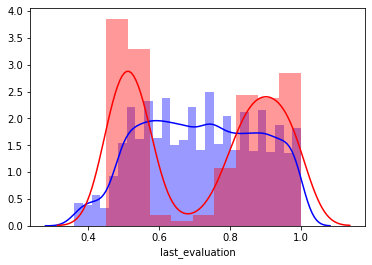

In [18]:
sns.distplot(hr[hr["left"]==0]['last_evaluation'], color="b")
sns.distplot(hr[hr["left"]==1]['last_evaluation'], color="r")

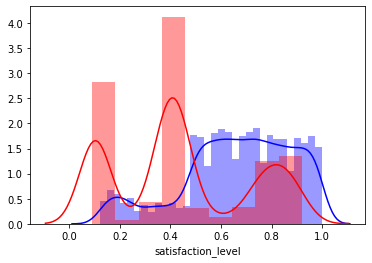

In [19]:
sns.distplot(hr[hr["left"]==0]['satisfaction_level'], color="b")
sns.distplot(hr[hr["left"]==1]['satisfaction_level'], color="r")

In [20]:
def hyp_test(data, dependent_col):
    col = list(data.columns)
    for i in col:
        if data[i].dtypes != "object":
            if data[i].nunique()>5:
                from scipy.stats import ttest_ind
                abc=ttest_ind(data[data[dependent_col]==0][i],data[data[dependent_col]==1][i])
                print(abc)

In [21]:
hyp_test(hr, dependent_col="left")

Ttest_indResult(statistic=40.98502015841721, pvalue=0.0)
Ttest_indResult(statistic=-1.4804874504607801, pvalue=0.13876948482811344)
Ttest_indResult(statistic=-3.3880208345839424, pvalue=0.0007062542110999653)
Ttest_indResult(statistic=-7.7286004860688795, pvalue=1.1739390712865618e-14)
Ttest_indResult(statistic=-19.266329594172518, pvalue=1.745810653156104e-81)
